In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import os

In [11]:
X_train = pd.read_csv("C:/Users/Janis/Desktop/DSA4262/Group project/f2_X_train.csv")
X_val = pd.read_csv("C:/Users/Janis/Desktop/DSA4262/Group project/f2_X_val.csv")
X_test = pd.read_csv("C:/Users/Janis/Desktop/DSA4262/Group project/f2_X_test.csv")
y_train = pd.read_csv("C:/Users/Janis/Desktop/DSA4262/Group project/f2_y_train.csv").values.ravel()
y_val = pd.read_csv("C:/Users/Janis/Desktop/DSA4262/Group project/f2_y_val.csv").values.ravel()
y_test = pd.read_csv("C:/Users/Janis/Desktop/DSA4262/Group project/f2_y_test.csv").values.ravel()

results = []

In [10]:
def plot_confusion(cm, title, save_name=None):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    if save_name:
        plt.savefig(save_name)
    plt.tight_layout()
    plt.show()

def plot_curves(y_true, y_probs, title_suffix, save_prefix=None):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    prec, rec, _ = precision_recall_curve(y_true, y_probs)

    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({title_suffix})")
    if save_prefix:
        plt.savefig(f"{save_prefix}_roc.png")
    plt.grid()
    plt.show()

    plt.plot(rec, prec)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({title_suffix})")
    if save_prefix:
        plt.savefig(f"{save_prefix}_pr.png")
    plt.grid()
    plt.show()

def evaluate(model, X, y, label=""):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y, y_proba)
    pr_auc = average_precision_score(y, y_proba)

    print(f"\n==== {label} ====")
    print("Confusion Matrix:\n", cm)
    print(classification_report(y, y_pred))
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")

    os.makedirs("plots", exist_ok=True)
    plot_confusion(cm, f"Confusion Matrix ({label})", save_name=f"plots/{label}_cm.png")
    plot_curves(y, y_proba, title_suffix=label, save_prefix=f"plots/{label}")

    return {
        "label": label,
        "confusion_matrix": cm.tolist(),
        "precision": round(report['1']['precision'], 4),
        "recall": round(report['1']['recall'], 4),
        "f1": round(report['1']['f1-score'], 4),
        "accuracy": round(report['accuracy'], 4),
        "roc_auc": round(roc_auc, 4),
        "pr_auc": round(pr_auc, 4)
    }

## Baseline RF


==== Baseline Random Forest ====

==== Baseline_RF_train ====
Confusion Matrix:
 [[83628     0]
 [    2  4093]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83628
           1       1.00      1.00      1.00      4095

    accuracy                           1.00     87723
   macro avg       1.00      1.00      1.00     87723
weighted avg       1.00      1.00      1.00     87723

ROC AUC: 1.0000
PR AUC: 1.0000


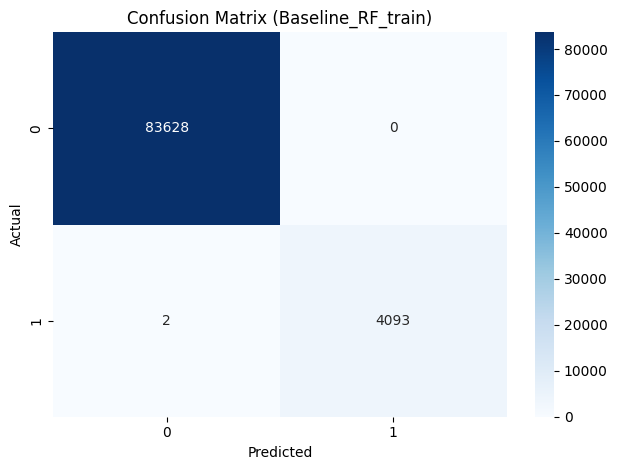

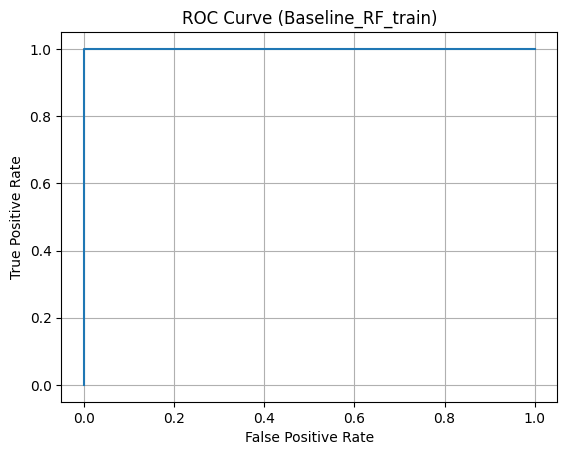

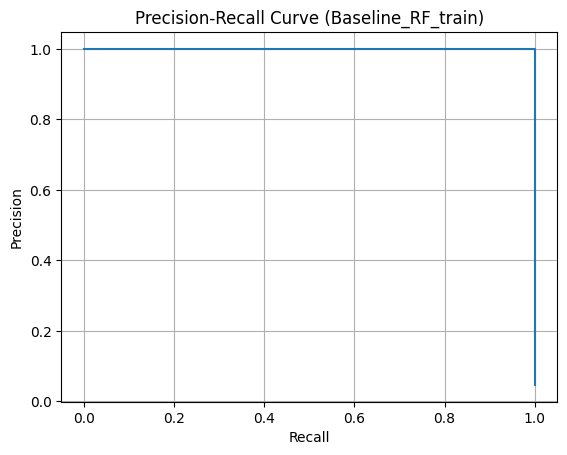


==== Baseline_RF_val ====
Confusion Matrix:
 [[20818   129]
 [  732   252]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20947
           1       0.66      0.26      0.37       984

    accuracy                           0.96     21931
   macro avg       0.81      0.62      0.67     21931
weighted avg       0.95      0.96      0.95     21931

ROC AUC: 0.8949
PR AUC: 0.4592


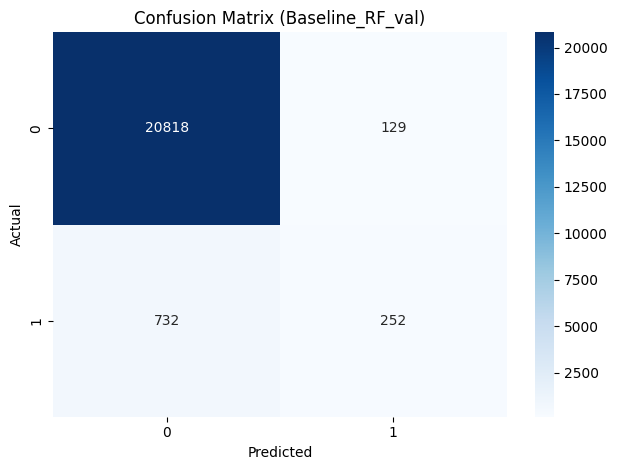

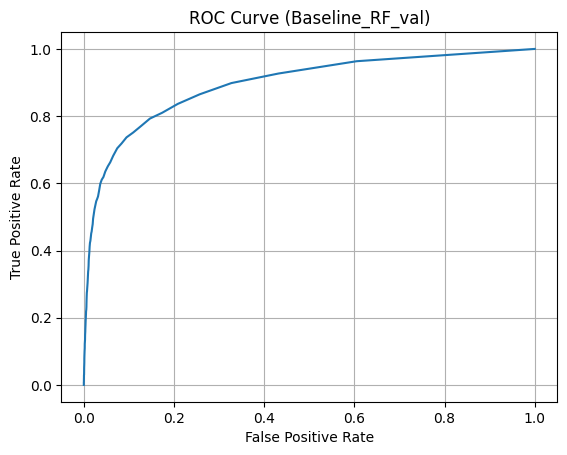

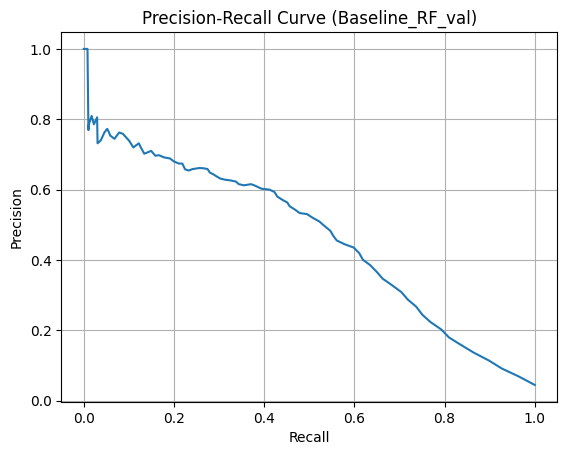


==== Baseline_RF_test ====
Confusion Matrix:
 [[11703    85]
 [  286   110]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11788
           1       0.56      0.28      0.37       396

    accuracy                           0.97     12184
   macro avg       0.77      0.64      0.68     12184
weighted avg       0.96      0.97      0.96     12184

ROC AUC: 0.9002
PR AUC: 0.3786


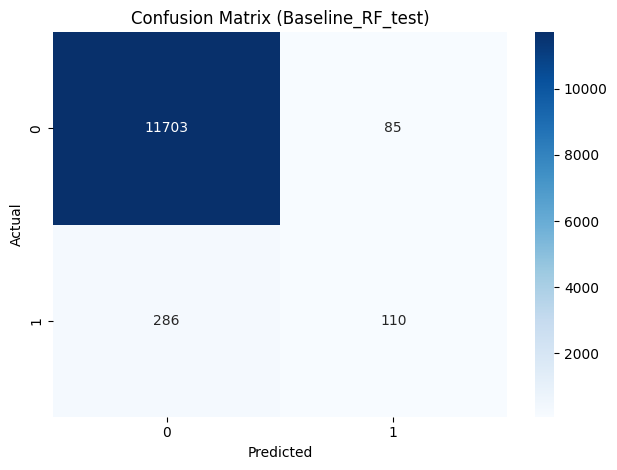

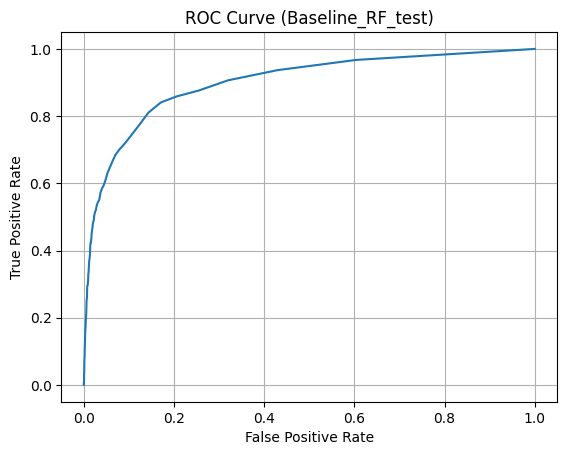

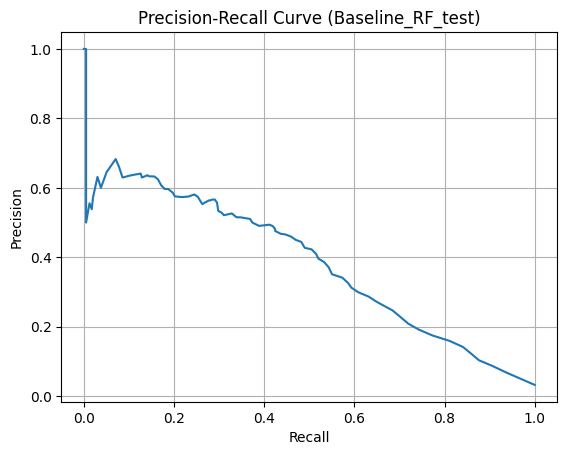

In [12]:
print("\n==== Baseline Random Forest ====")
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
results.append(evaluate(rf_baseline, X_train, y_train, "Baseline_RF_train"))
results.append(evaluate(rf_baseline, X_val, y_val, "Baseline_RF_val"))
results.append(evaluate(rf_baseline, X_test, y_test, "Baseline_RF_test"))

## RF + SMOTE


==== Random Forest + SMOTE ====

==== RF_SMOTE_train ====
Confusion Matrix:
 [[83628     0]
 [    0  4095]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83628
           1       1.00      1.00      1.00      4095

    accuracy                           1.00     87723
   macro avg       1.00      1.00      1.00     87723
weighted avg       1.00      1.00      1.00     87723

ROC AUC: 1.0000
PR AUC: 1.0000


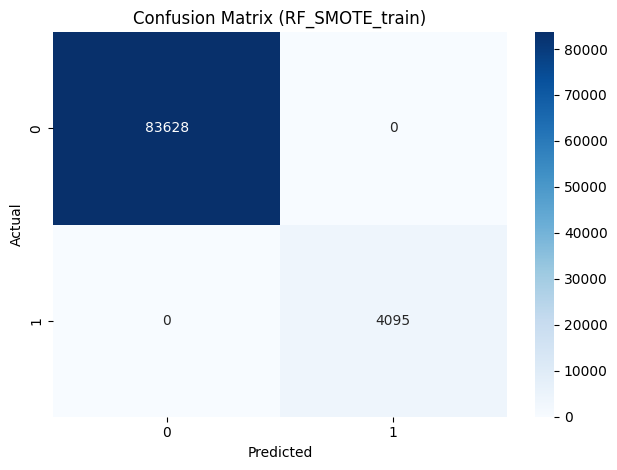

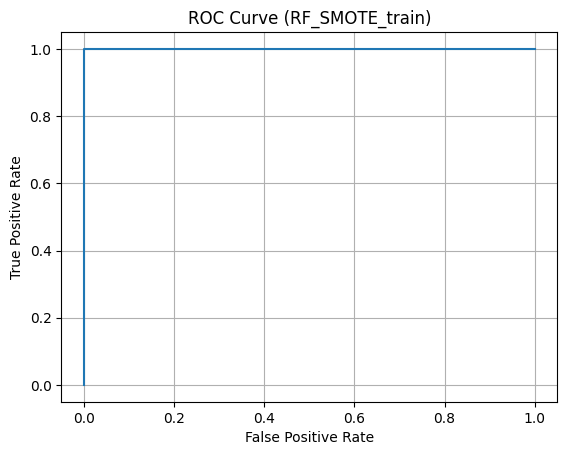

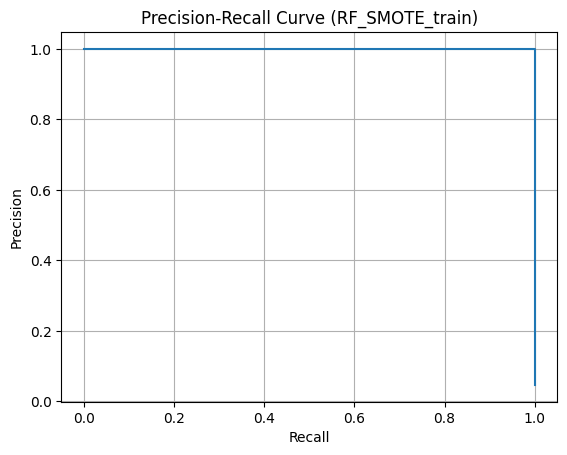


==== RF_SMOTE_val ====
Confusion Matrix:
 [[20302   645]
 [  447   537]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     20947
           1       0.45      0.55      0.50       984

    accuracy                           0.95     21931
   macro avg       0.72      0.76      0.73     21931
weighted avg       0.95      0.95      0.95     21931

ROC AUC: 0.9065
PR AUC: 0.4346


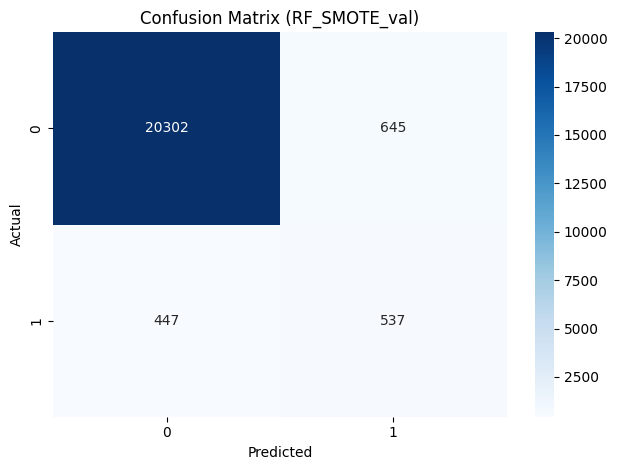

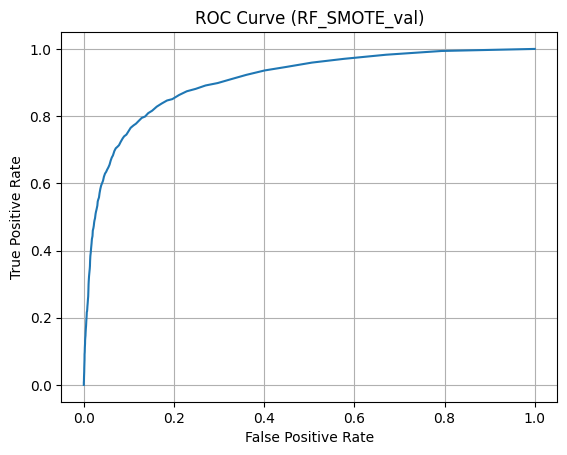

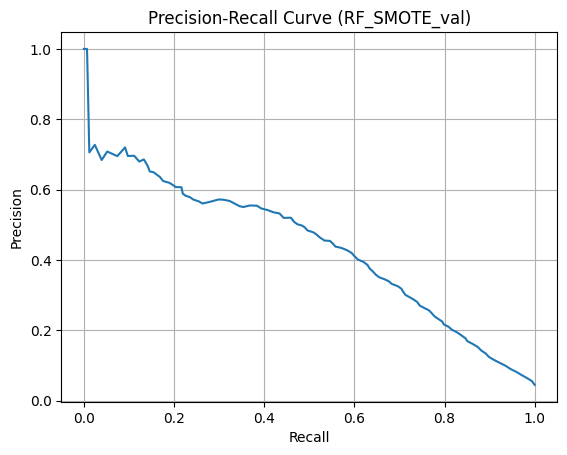


==== RF_SMOTE_test ====
Confusion Matrix:
 [[11414   374]
 [  169   227]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11788
           1       0.38      0.57      0.46       396

    accuracy                           0.96     12184
   macro avg       0.68      0.77      0.72     12184
weighted avg       0.97      0.96      0.96     12184

ROC AUC: 0.9081
PR AUC: 0.3734


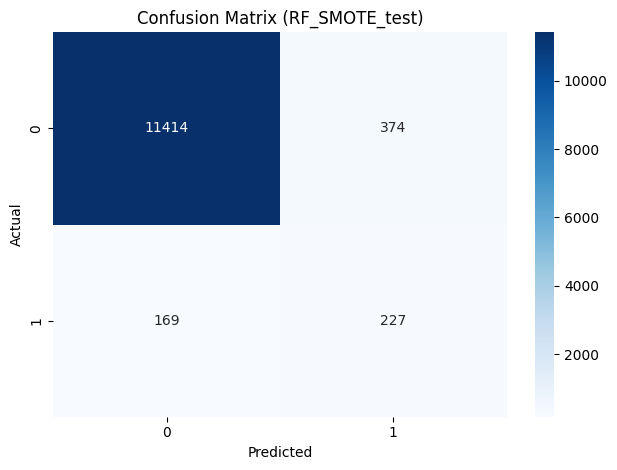

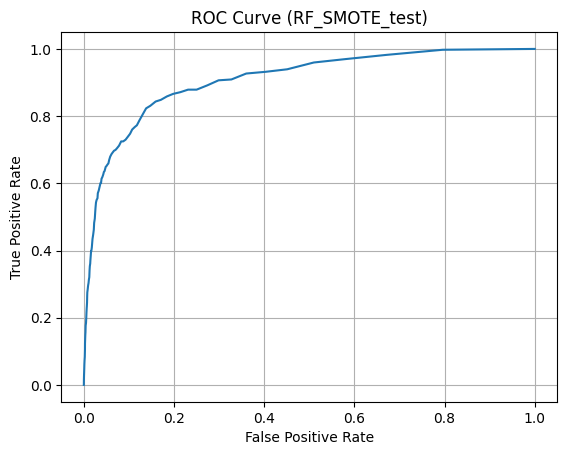

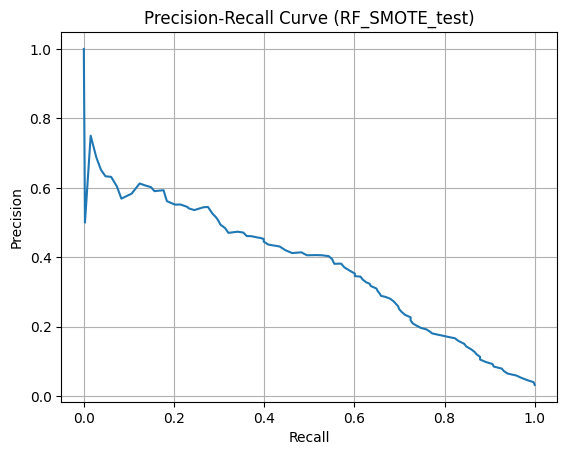

In [13]:
print("\n==== Random Forest + SMOTE ====")
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_sm, y_train_sm)
results.append(evaluate(rf_smote, X_train, y_train, "RF_SMOTE_train"))
results.append(evaluate(rf_smote, X_val, y_val, "RF_SMOTE_val"))
results.append(evaluate(rf_smote, X_test, y_test, "RF_SMOTE_test"))

## RF + SMOTE+ Tuning


==== RF + SMOTE + GridSearchCV (PR AUC) ====
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Params: {'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}

==== RF_SMOTE_Tuned_train ====
Confusion Matrix:
 [[83614    14]
 [    8  4087]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83628
           1       1.00      1.00      1.00      4095

    accuracy                           1.00     87723
   macro avg       1.00      1.00      1.00     87723
weighted avg       1.00      1.00      1.00     87723

ROC AUC: 1.0000
PR AUC: 1.0000


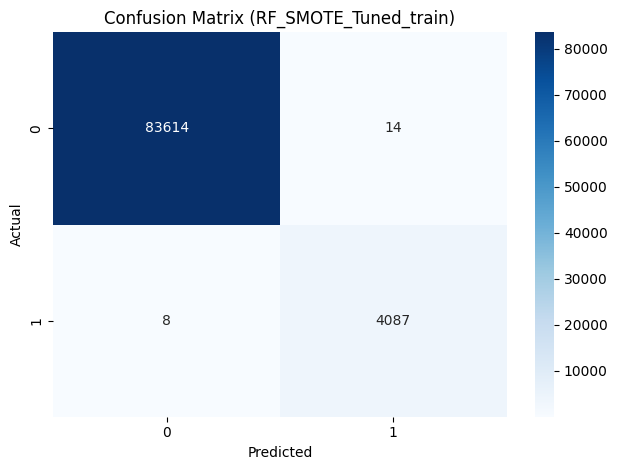

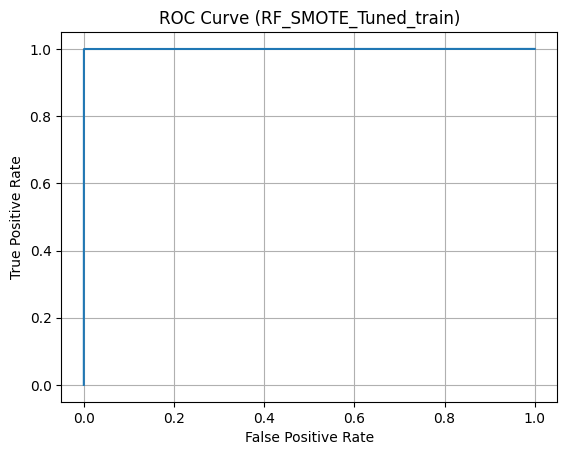

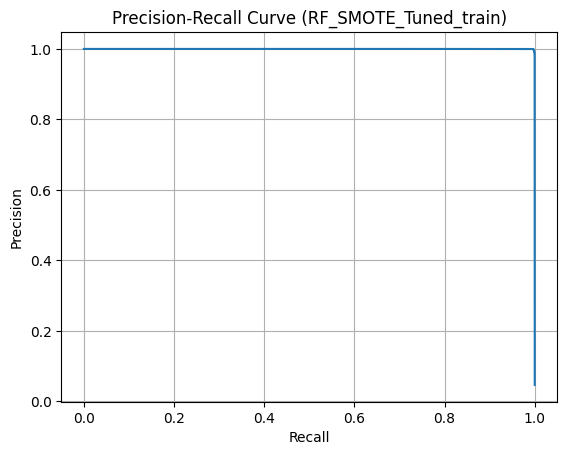


==== RF_SMOTE_Tuned_val ====
Confusion Matrix:
 [[20278   669]
 [  453   531]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     20947
           1       0.44      0.54      0.49       984

    accuracy                           0.95     21931
   macro avg       0.71      0.75      0.73     21931
weighted avg       0.95      0.95      0.95     21931

ROC AUC: 0.9059
PR AUC: 0.4421


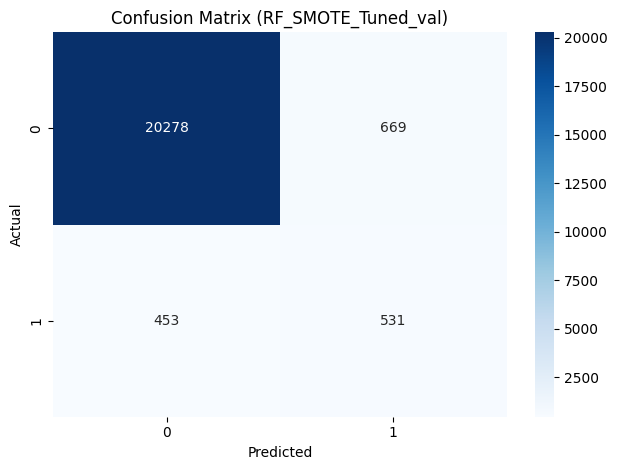

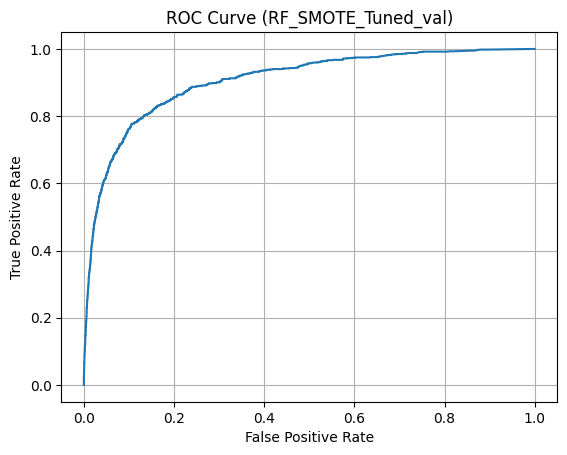

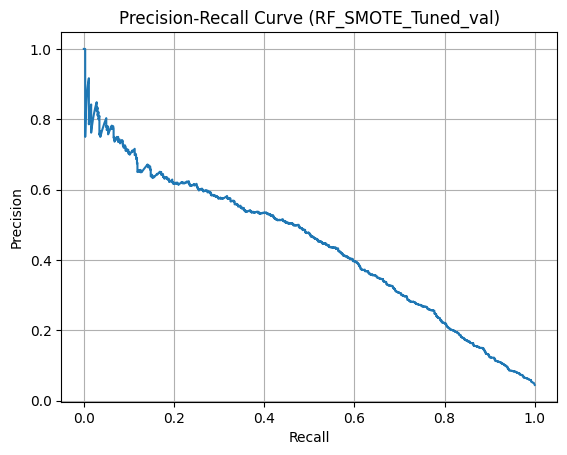


==== RF_SMOTE_Tuned_test ====
Confusion Matrix:
 [[11393   395]
 [  168   228]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11788
           1       0.37      0.58      0.45       396

    accuracy                           0.95     12184
   macro avg       0.68      0.77      0.71     12184
weighted avg       0.97      0.95      0.96     12184

ROC AUC: 0.9108
PR AUC: 0.3789


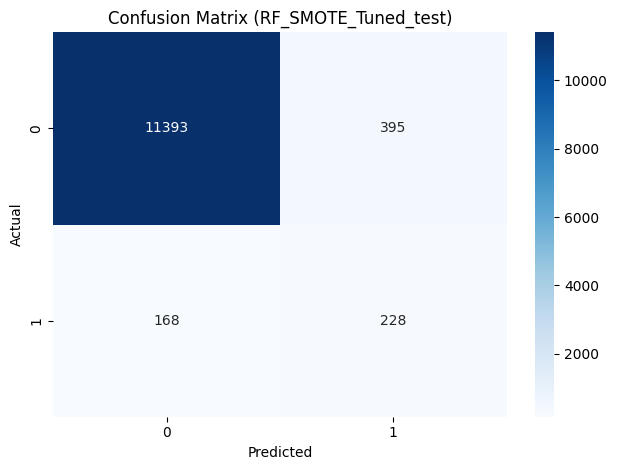

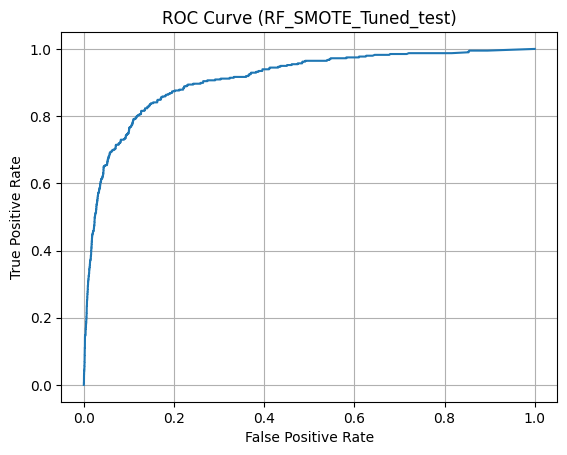

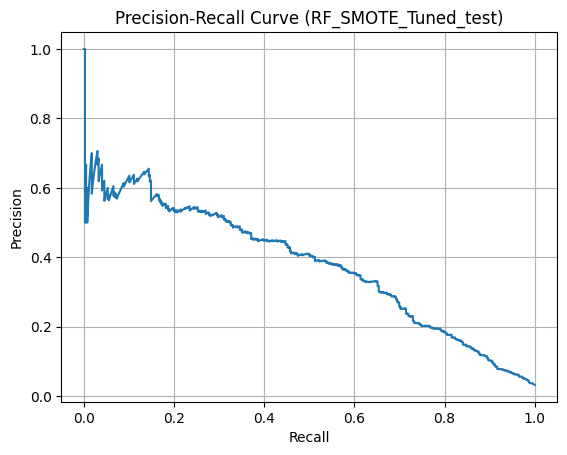

In [15]:
from imblearn.pipeline import Pipeline

print("\n==== RF + SMOTE + GridSearchCV (PR AUC) ====")
param_grid = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 10],
    "rf__min_samples_split": [2, 5]
}

pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("rf", RandomForestClassifier(random_state=42))
])

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring="average_precision",
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("\nBest Params:", grid.best_params_)

results.append(evaluate(best_model, X_train, y_train, "RF_SMOTE_Tuned_train"))
results.append(evaluate(best_model, X_val, y_val, "RF_SMOTE_Tuned_val"))
results.append(evaluate(best_model, X_test, y_test, "RF_SMOTE_Tuned_test"))